# Perplexity in Language Models

**Definition:**

$$
P(W) = \exp\left( -\frac{1}{N} \sum_{i=1}^{N} \log P(w_i | w_1, w_2, \dots, w_{i-1}) \right)
$$

Where:
- $ P(w_i | w_1, \dots, w_{i-1}) $: Conditional probability of $ w_i $
- $ N $: Number of words in the sequence



**Log-Likelihood Sum:**

$$
\sum_{i=1}^{N} \log P(w_i | w_1, \dots, w_{i-1})
$$

Represents the cumulative uncertainty of the model's predictions.

---

**Interpretation:**
- **Lower Perplexity**: Indicates better model performance, meaning the model is more confident in its predictions and less surprised by the data.
- **Higher Perplexity**: Indicates worse model performance, meaning the model is less confident or struggles to predict the data accurately.

**What It Interprets:**
Perplexity interprets the **uncertainty** of the language model: the lower the perplexity, the less uncertainty the model has in predicting the next word in a sequence.


In [15]:
!pip3 install -q lmppl

import warnings
import numpy as np
import matplotlib.pyplot as plt
import lmppl


warnings.filterwarnings('ignore')
plt.style.use('dark_background')
scorer = lmppl.LM('gpt2', device_map='cpu', low_cpu_mem_usage=True)

In [16]:
# Sentence and corresponding word splits
sentence = 'We celebrate Christmas on the 25th of every'
words = sentence.split(' ')

# Get perplexities for different context sizes
ppl_values = [
    scorer.get_perplexity(' '.join(words[:2])),
    scorer.get_perplexity(' '.join(words[:3])),
    scorer.get_perplexity(' '.join(words[:4])),
    scorer.get_perplexity(' '.join(words))
]

print(ppl_values)

100%|██████████| 1/1 [00:00<00:00, 30.68it/s]

[11963.835488696392, 1366.2190412861676, 460.76156089870796, 46.20063337388885]


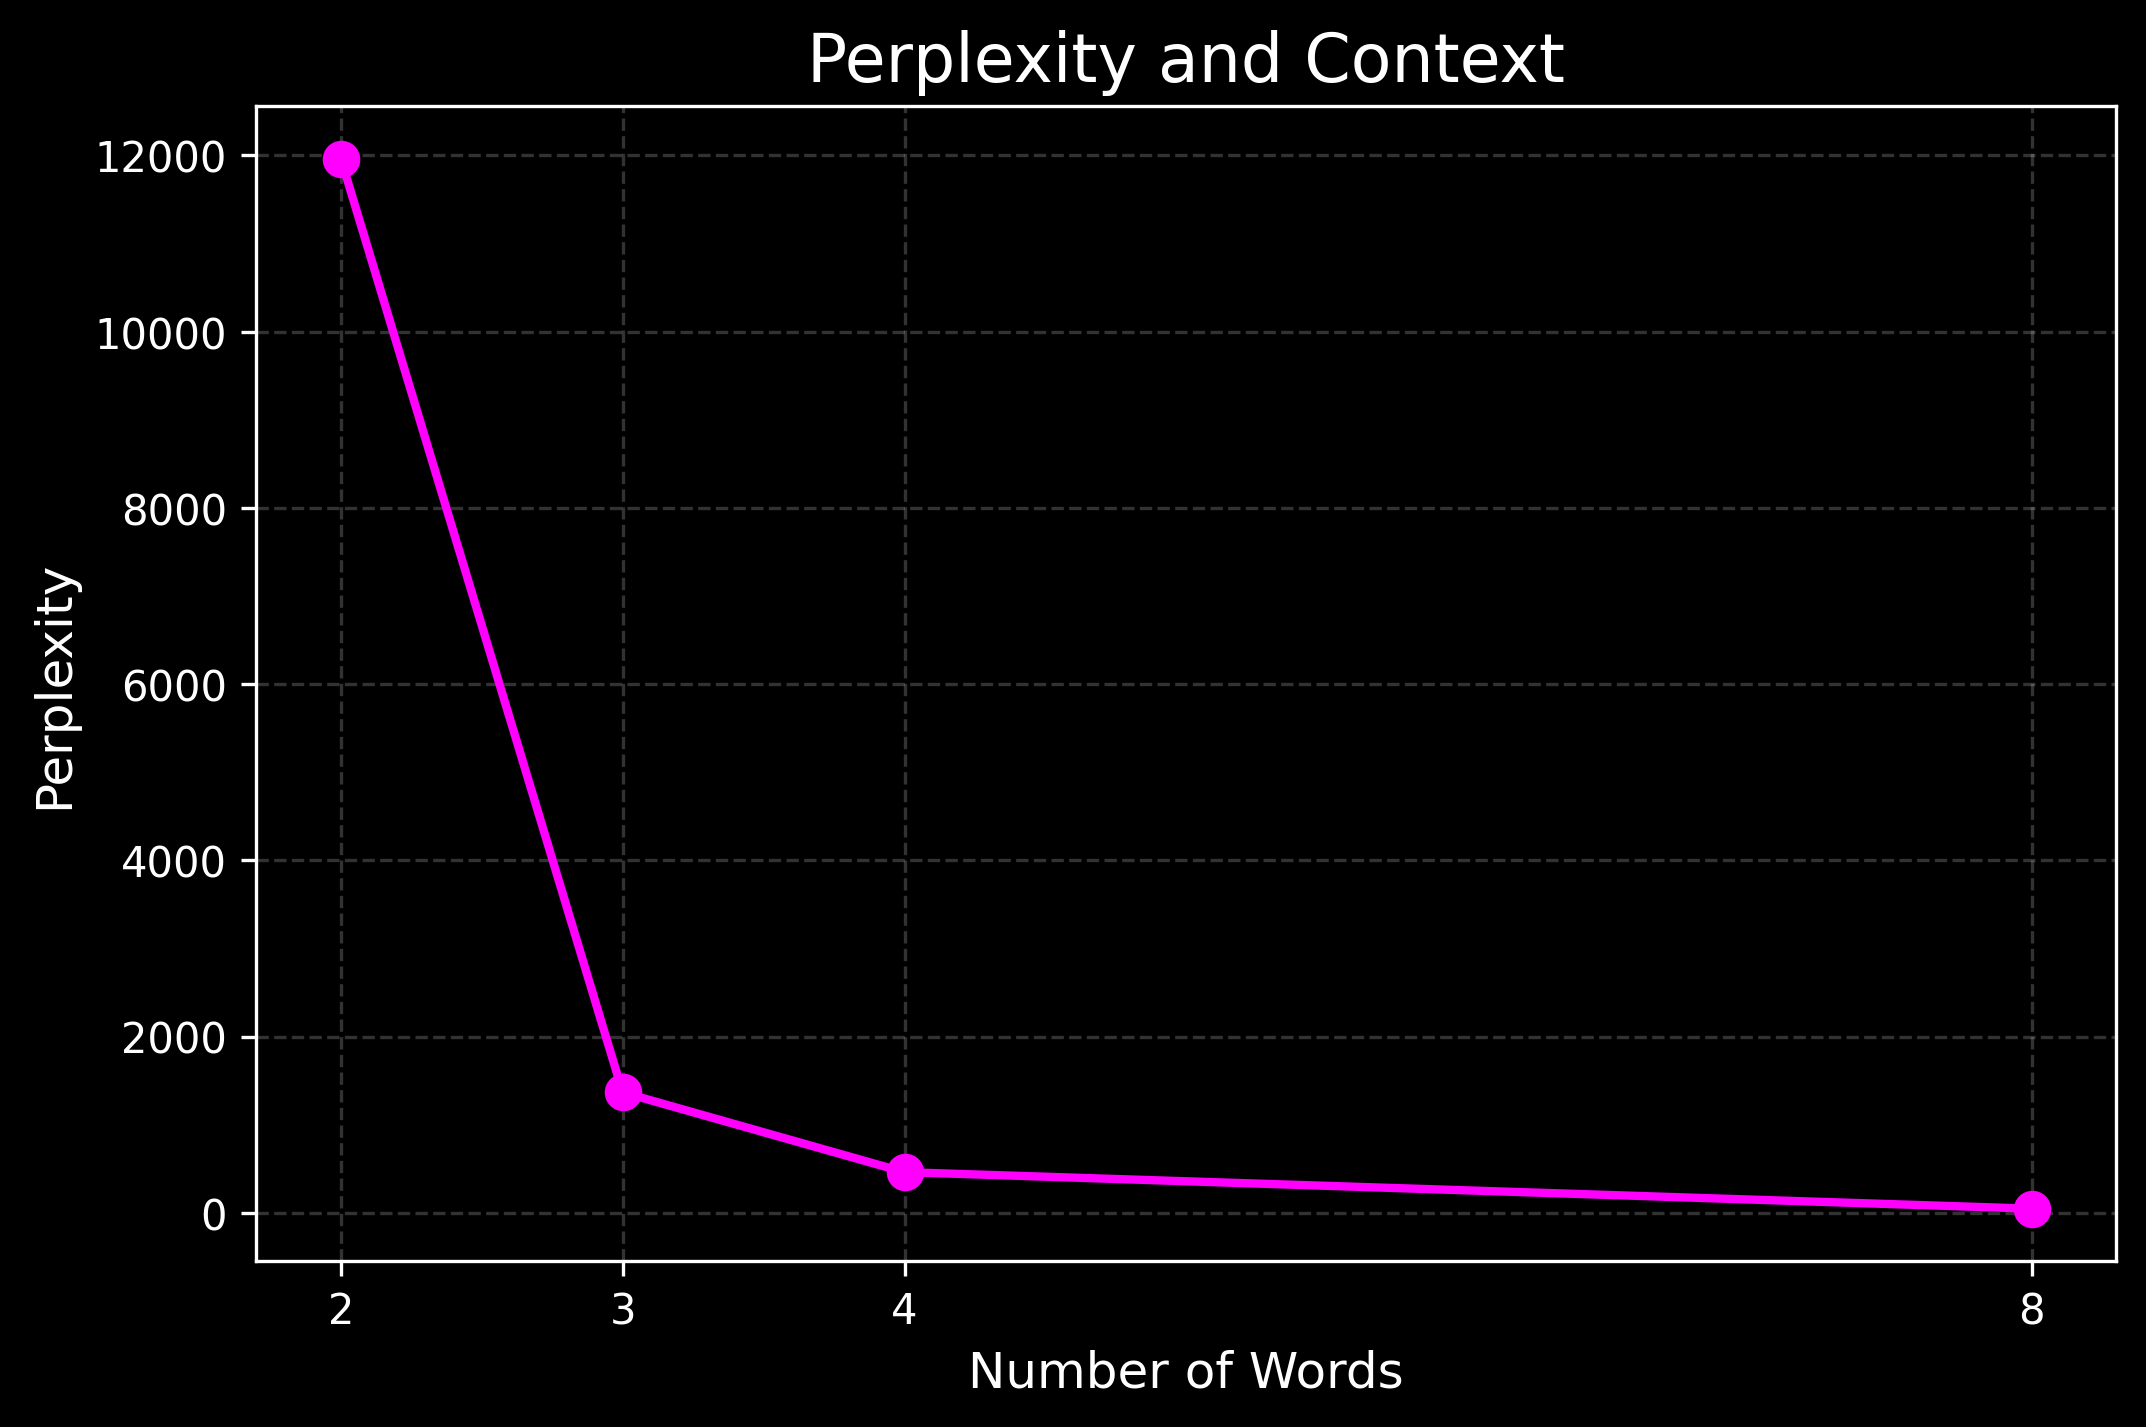

In [17]:
x_labels = [2, 3, 4, len(words)]

# Plotting the perplexity values
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(x_labels, ppl_values, marker='o', 
         color='magenta', linestyle='-', linewidth=2, 
         markersize=8)
plt.title('Perplexity and Context', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Perplexity', fontsize=12)
plt.xticks(x_labels)
plt.grid(True, alpha=0.2, linestyle='--')
plt.show()